## Numerical Analysis Homework 8
---
Student 林之然(B11209005) and 蔡知諺(B11209014), both in department 大氣系 and grade 1.

### Instruction to this Jupyter Notebook:
1. Assign the kernel where you normally run Python.  

2. Click the [全部執行] button or Cell > Run All to execute the entire code. 

3. Look through the codes and discussions.  

4. If the discussion text is not displayed properly (e.g. the line height is too short for read), please find the attached .html file.

5. Because we're using %%timeit magic command to check the time, it takes more time (about 15 seconds) for the program to complete.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func_ODE(x,y):
    return 2*y-x**2-x
h = 0.6
X = np.linspace(1,19,int((19-1)/h+1),dtype=np.float64)
Y = 3*np.ones(int((19-1)/h+1),dtype=np.float64)

#### 1.1 Euler's method

Here we write a function Solve_Euler(x0,y0,func_ODE,h) to be the one iteration it need to run the whole calculation of solving the 1st order ODE with Euler's method. 

In [3]:
def Solve_Euler(x0,y0,func_ODE,h):
    def slope(x,y,func_ODE):
        return func_ODE(x,y)
    x1 = x0 + h
    y1 = y0 + slope(x0,y0,func_ODE)*h
    
    return x1,y1

The reason to only write one iteration step instead of the entire loop is for the capability to assign the datatype of the array (although we just copy the X and Y assigned before).

In [4]:
X11 = X.copy()
Y11 = Y.copy()

Then the loop is presented here:

In [5]:
%%timeit
for i in range(1,int((19-1)/h+1)):
    X11[i],Y11[i] = Solve_Euler(X11[i-1],Y11[i-1],func_ODE,h)
    #print(X[i],Y[i])

15.7 µs ± 131 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


We calculate the mean operation time using IPython inbuild magic command %%timeit. This we be used in 1.7.

#### 1.2 Modified Euler's method

Here we use the similar pattern to the previous function, copy a set of new X, Y arrays, and iterate the solution with Modified Euler's method. 

In [6]:
def Solve_ModEuler(x0,y0,func_ODE,h):
    def slope(x,y,func_ODE):
        return func_ODE(x,y)
    x1 = x0 + h
    y1 = y0 + slope(x0,y0,func_ODE)*h
    y1 = y0 + (slope(x0,y0,func_ODE)+slope(x1,y1,func_ODE))*h/2
    
    return x1,y1

In [7]:
X12 = X.copy()
Y12 = Y.copy()

In [8]:
%%timeit
for i in range(1,int((19-1)/h+1)):
    X12[i],Y12[i] = Solve_ModEuler(X12[i-1],Y12[i-1],func_ODE,h)
    #print(X[i],Y[i])

30.7 µs ± 777 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


We still use %%timeit to calculate the mean operation time. 

#### 1.3 RK4 method

Still the same pattern, but this time is the RK4 method. This involves more complicated calculation, so more x2, y2, etc. are added, but the final value are x4 and y4.

In [9]:
def Solve_RK4(x0,y0,func_ODE,h):
    def slope(x,y,func_ODE):
        return func_ODE(x,y)
    
    k1 = slope(x0,y0,func_ODE)
    x1 = x0 + h/2
    y1 = y0 + k1*h/2
    k2 = slope(x1,y1,func_ODE)
    x2 = x0 + h/2
    y2 = y0 + k2*h/2
    k3 = slope(x2,y2,func_ODE)
    x3 = x0 + h
    y3 = y0 + k3*h
    k4 = slope(x3,y3,func_ODE)

    x4 = x0 + h
    y4 = y0 + (k1+2*k2+2*k3+k4)*h/6
    
    return x4,y4

In [10]:
X13 = X.copy()
Y13 = Y.copy()

In [11]:
%%timeit
for i in range(1,int((19-1)/h+1)):
    X13[i],Y13[i] = Solve_RK4(X13[i-1],Y13[i-1],func_ODE,h)

49.5 µs ± 519 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Still use %%timeit to record the operation time.

#### 1.4 Compare with true solution

Here we use a function to calcaulate the true solution given by the equation in the question. 

In [12]:
def True_Sol(X):
    return X+(X**2)/2+np.exp(2*X-2)+1/2
X_true = X.copy()
Y_true = True_Sol(X_true)

Then, we plot all results: in Euler's method (1.1), Modified Euler method (1.2), RK4 method (1.3) and the True solution, in the graph below.

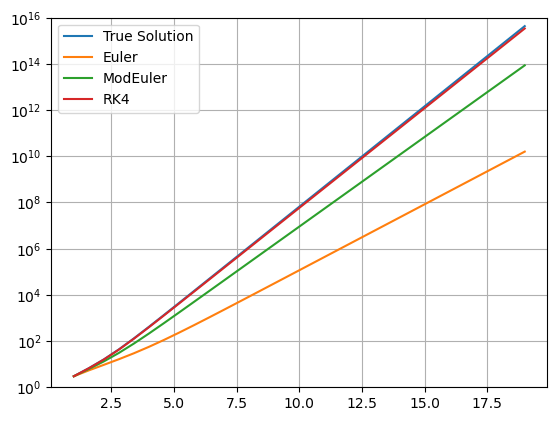

In [13]:
plt.plot(X_true, Y_true)
plt.plot(X11, Y11)
plt.plot(X12, Y12)
plt.plot(X13, Y13)
plt.ylim(bottom=1,top=1e16)
plt.legend(['True Solution', 'Euler', 'ModEuler', 'RK4'])
plt.yscale('log')
plt.grid()

In [14]:
# the ratio of the true solution and the numerical solutions
print(Y_true[-1]/Y11[-1],Y_true[-1]/Y12[-1],Y_true[-1]/Y13[-1])

270708.56248459144 49.91819122898128 1.266309221655393


As shown in the graph, we can see that the RK4 solution is the most closed to the true solution, at least in the same order of magnitude. The other two solutions show the same exponential increasing trend, but are different in the order of magnitude of the final solution: about 300000 times for Euler's method and 50 times for Modified Euler's method. 

Then, we calculate and plot the relative errors of the three numerical methods, compared to the true solution.

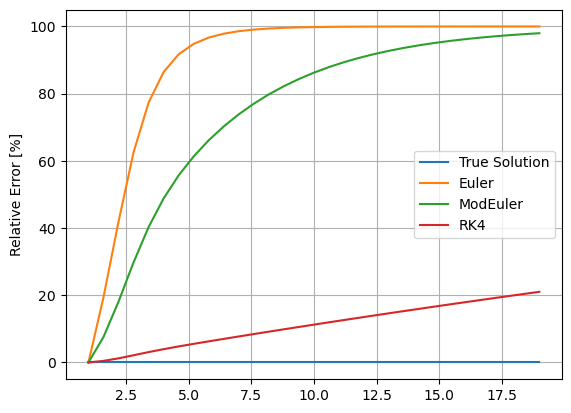

In [15]:
relative0 = (Y_true - Y_true)/Y_true
relative1 = (Y_true - Y11)/Y_true
relative2 = (Y_true - Y12)/Y_true
relative3 = (Y_true - Y13)/Y_true

plt.plot(X, relative0 * 100)
plt.plot(X, relative1 * 100)
plt.plot(X, relative2 * 100)
plt.plot(X, relative3 * 100)
plt.ylabel('Relative Error [%]')
plt.legend(['True Solution', 'Euler', 'ModEuler', 'RK4'])
plt.grid()

#### 1.5 

We've used %%timeit to calculate the mean operation time of the three numerical methods, the results are presented in the following table. Worth noticed that the mean time may be different in each test, so the number is based on our attempt. 

|Numerical method|Mean Operation Time|
|-|-|
|Euler|15.8 µs ± 162 ns|
|Modified Euler|30.8 µs ± 190 ns|
|RK4|49.3 µs ± 335 ns|

By the table above, we can quantitatively see the clear difference between the efficiency of the three methods. The Euler's method is the fastest, and the Modiefied Euler's method use twice the time. RK4 method is the slowest, which takes more than three times of the Euler's method's to get the solution. 

|	|Time (order)	|Accuracy (order)|
|---------------|----|---|
|Euler          |   1|	3|
|Modified Euler |   2|	2|
|RK4 method     |   3|	1|

Qualitatively, the Euler method is simple and efficient but inaccurate for complex systems. The RK4 method is more accurate but computationally expensive, making it less efficient for simple problems. Choosing efficiency over accuracy can lead to unreliable results. In this case, both Euler and Modified Euler methods lead to unacceptably high errors, while the error of the RK4 method is relatively controllable. Therefore, it’s necessary to choose a slower but reliable method (here, the RK4 method), or what we lost will go beyond our control. 

#### 1.6 test how small h Euler needs to have the same accuracy as RK4

In [16]:
#%%time
X16 = X11.copy()
Y16 = Y11.copy()
j = 0
h16 = 0.6
while (abs(Y16[-1]-Y_true[-1]) > abs(Y13[-1]-Y_true[-1])):
    h16 /= 2
    X16 = np.linspace(1,19,int((19-1)/h16+1),dtype=np.float64)
    Y16 = 3*np.ones(int((19-1)/h16+1))
    for i in range(1,int((19-1)/h16+1)):
        X16[i],Y16[i] = Solve_Euler(X16[i-1],Y16[i-1],func_ODE,h16)
    j += 1
print(j,h16)
#print(np.log(h16/0.6)/np.log(0.5))

7 0.0046875


By the code above, we know that once the h is reduced by half 7 times, i.e. the new $h' = h \times 2^{-7} = 0.0046875$.Although the solution is not the exact solution, which it actually between $h \times 2^{-6}$ and $h \times 2^{-7}$, but we are closed enough to it. 
The rough answer give us the idea that the x interval used to iterate must be relatively very small to the original to reach the same accuracy with RK4 method.

An additional graph is shown below to proove how we reach the final $\small h'$, this graph is drawn by another classmate so we just put it here:  

![](EulervsRK4.png)

We can see the line of Euler's method (those other than the red and the blue lines) gradually reach the true solution and finally exceed the RK4's. 

#### 1.7

Here we run the Euler method with the final $\small h'$ once again to calculate the mean operation time for the loop. 

In [17]:
X16 = np.linspace(1,19,int((19-1)/h16+1),dtype=np.float64)
Y16 = 3*np.ones(int((19-1)/h16+1))

In [18]:
%%timeit
for i in range(1,int((19-1)/h16+1)):
    X16[i],Y16[i] = Solve_Euler(X16[i-1],Y16[i-1],func_ODE,h16)

1.98 ms ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The number of our attempt shows that the mean operation time is **2.02 ms ± 36.3 µs**. This is about 40 times of the RK4 method's (49.3 µs ± 335 ns). 
Therefore, to get the same accuracy, the Euler method is 40 times slower than the RK4 method. And we can conclude this along with what we've done in 1.5:  
Although Euler's method is faster than RK4 method with the same h, but it whether lead to disastrous error, or is needed much more time (and the tinier h) to get the same accuracy. Therefore, RK4 is much better than the Euler's method in solving 1st order ODE. 